In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_excel('/content/sample_data/Childcare avaliablity In calaiforina.xlsx')

In [ ]:
#validate data
data.head(3)

In [ ]:
#data observation, data type and point, missing data
data.info()

In [ ]:
# Check for missing values
print(data.isnull().sum())



In [ ]:
#drop columns that I wont be using for the analysis
columns_to_drop =['display_year','geography','year', 'display_year','category_1','Total Number of Resident','No of childcare liscensed facility center','No of family childcare liscensed facility home',  ]
print(data.drop(columns=columns_to_drop).head())

In [ ]:
#resolve missing values
# Calculate median of each column
median_values = data.median()

# Replace missing values with median
data.fillna(median_values, inplace=True)

In [ ]:
print(data.isnull().sum())

In [ ]:
data.describe()

In [ ]:

data[['Total License childcare facility home and center','0-5 children living in poverty','Total Number of children 0-5','Children without childcare']].corr()

<function matplotlib.pyplot.show(close=None, block=None)>

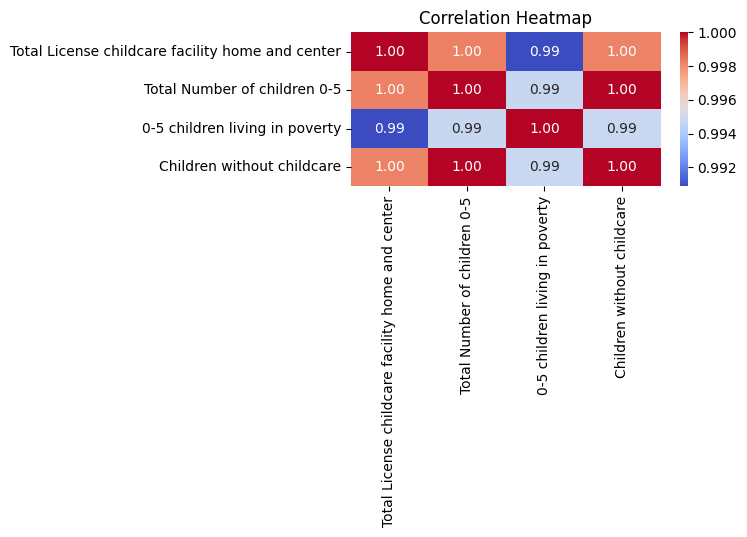

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 2))
sns.heatmap(data[['Total License childcare facility home and center','Total Number of children 0-5','0-5 children living in poverty','Children without childcare']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
#data[['Total childcare cost infant and preschool home','Chidcare Afffordability predictor']].corr()

In [ ]:
#plt.figure(figsize=(8, 5))
#sns.heatmap(data[['Total childcare cost infant and preschool home','Chidcare Afffordability predictor']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Heatmap')
#plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
#Define the independent and dependent variable
features = ['Total Number of children 0-5','Total License childcare facility home and center','0-5 children living in poverty']
target1 =['Children without childcare']
#target2 = ['Chidcare Afffordability predictor']




In [ ]:
# Split data into features and target variables
x = data[features]
y1 = data[target1]
#y2 = data[target2]

In [ ]:
# Split data into training and testing sets
x_train, x_test, y1_train, y1_test, = train_test_split(x, y1, test_size=0.3, random_state=42)


In [ ]:
# Create a linear regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(x_train, y1_train)



LinearRegression()

In [ ]:
# Make predictions using the testing set
y_pred = model.predict(x_test)
#print the predicted test results
print('\nPredicted test results:')
print(y_pred)



In [ ]:
#print coefficients of the independent varaibles
coefficients = pd.DataFrame(model.coef_.T, x.columns, columns=['Coefficient'])
print('\nCoefficients:')
print(coefficients)


Coefficients:
                                                   Coefficient
Total Number of children 0-5                      1.000000e+00
Total License childcare facility home and center -1.000000e+00
0-5 children living in poverty                    5.551115e-16


In [ ]:
#check prediction score
model.score(x_test,y1_test)

1.0

In [ ]:
# Model evaluation
mse = mean_squared_error(y1_test, y_pred)
r2 = r2_score(y1_test, y_pred)
print('\nModel Evaluation:')
print('Mean Squared Error:', mse)
print('R-squared:', r2)


Model Evaluation:
Mean Squared Error: 1.2113945356972197e-18
R-squared: 1.0
